In [93]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Gather Data

In [94]:
boston_dataset = load_boston()

### Data points and featues

In [95]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [96]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## Data Exploration 

In [97]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price
data["PRICE"] = boston_dataset.target

In [98]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [99]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [100]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [101]:
pd.isnull(data).any() 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

## Visualising Data 

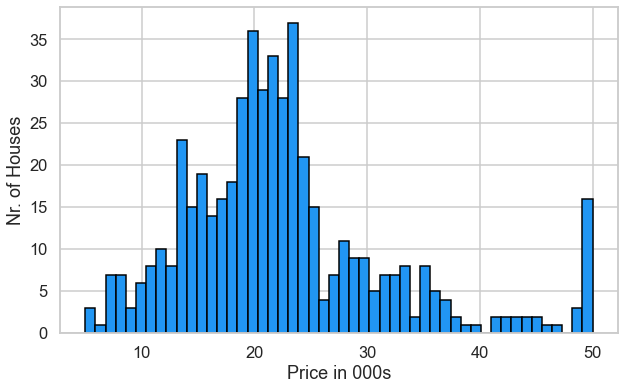

In [102]:
plt.figure(figsize=[10, 6])
plt.hist(data["PRICE"], bins=50, ec="black", color="#2196f3")
plt.xlabel("Price in 000s")
plt.ylabel("Nr. of Houses")
plt.show()

<Figure size 720x432 with 0 Axes>

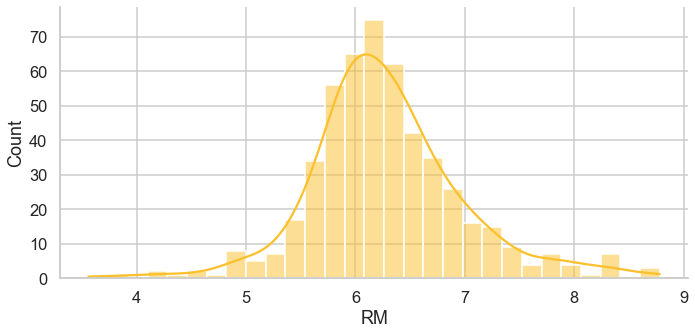

In [103]:
plt.figure(figsize=[10, 6])
sns.displot(data["RM"], kde=True, color="#fbc02b", aspect=2)
plt.show()

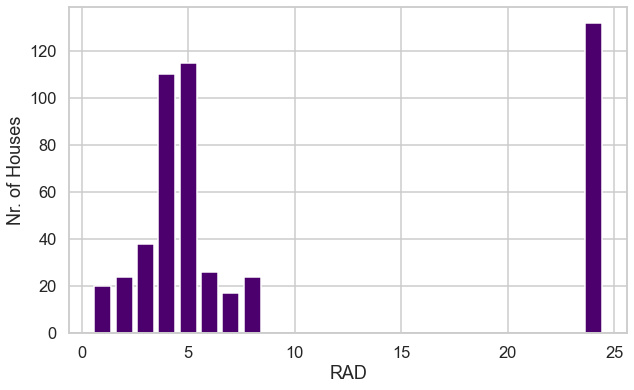

In [104]:
plt.figure(figsize=[10, 6])
frequency = data["RAD"].value_counts()
plt.bar(frequency.index, height=frequency, color="#4b006e")
plt.xlabel("RAD")
plt.ylabel("Nr. of Houses")
plt.show()

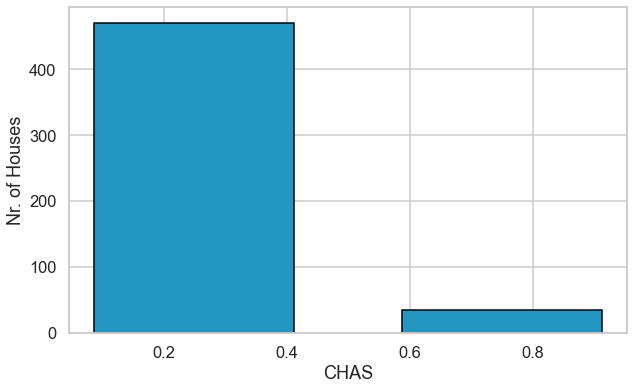

In [105]:
plt.figure(figsize=[10, 6])
plt.hist(data["CHAS"], bins=2, ec="black", color="#2396c1", rwidth=0.65)
plt.xlabel("CHAS")
plt.ylabel("Nr. of Houses")
plt.show()

## Descriptive Statistics

In [106]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X, Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [107]:
data.corr() # Pearson Correlation Method

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [108]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

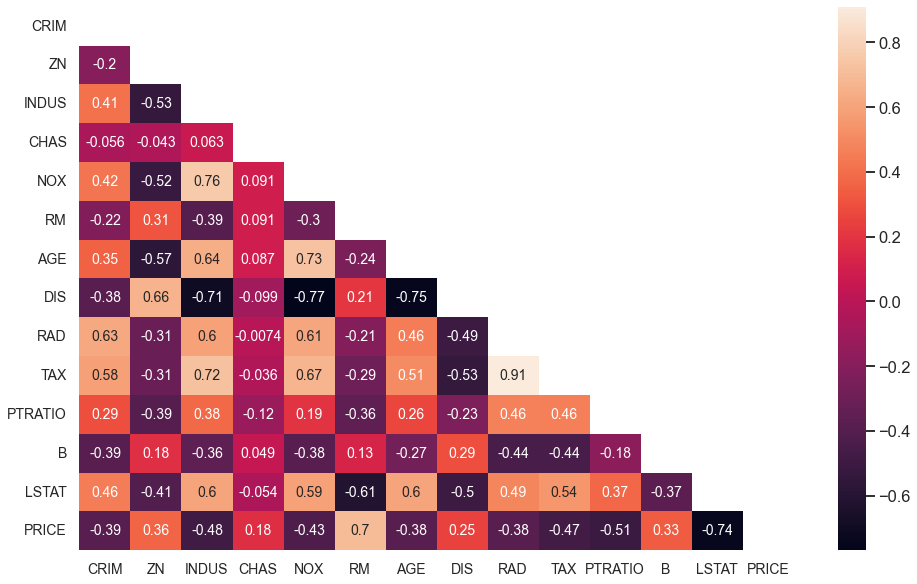

In [109]:
plt.figure(figsize=[16, 10])
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Some interesting correlations visualized

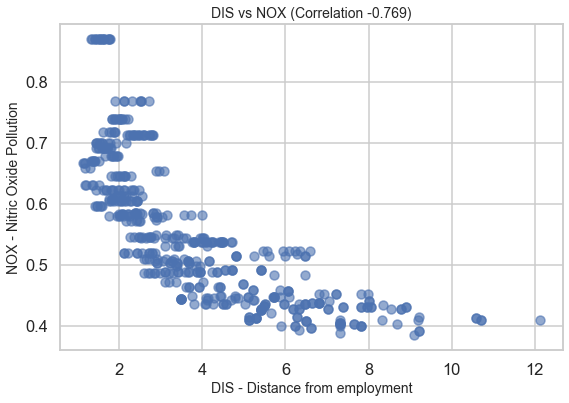

In [110]:
nox_dis_corr = round(data["NOX"].corr(data["DIS"]), 3)

plt.figure(figsize=[9, 6])
plt.scatter(data["DIS"], data["NOX"], alpha=0.6, s=80)

plt.title(f"DIS vs NOX (Correlation {nox_dis_corr})", fontsize=14)
plt.xlabel("DIS - Distance from employment", fontsize=14)
plt.ylabel("NOX - Nitric Oxide Pollution", fontsize=14)
plt.show()

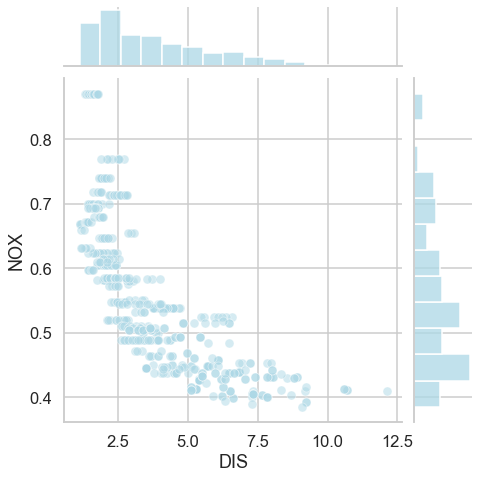

In [111]:
sns.set() 
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], height=7, color="lightblue", joint_kws={"alpha":0.5})
plt.show()

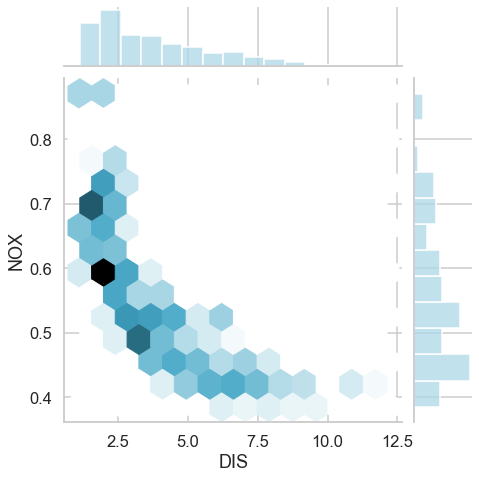

In [112]:
sns.set() # Reset previous used styles
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], height=7, color="lightblue", kind="hex")
plt.show()

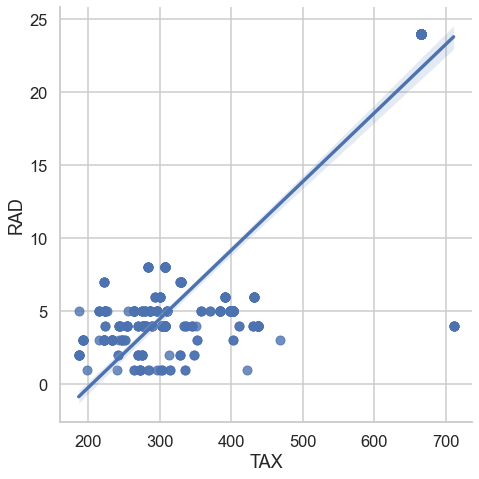

In [113]:
sns.lmplot(x="TAX", y="RAD", data=data, height=7)
plt.show()

/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


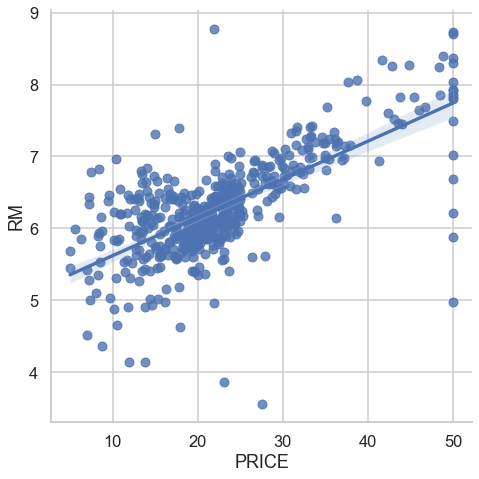

In [114]:
sns.lmplot(x="PRICE", y="RM", data=data, size=7)
plt.show()

## All correlations visualized

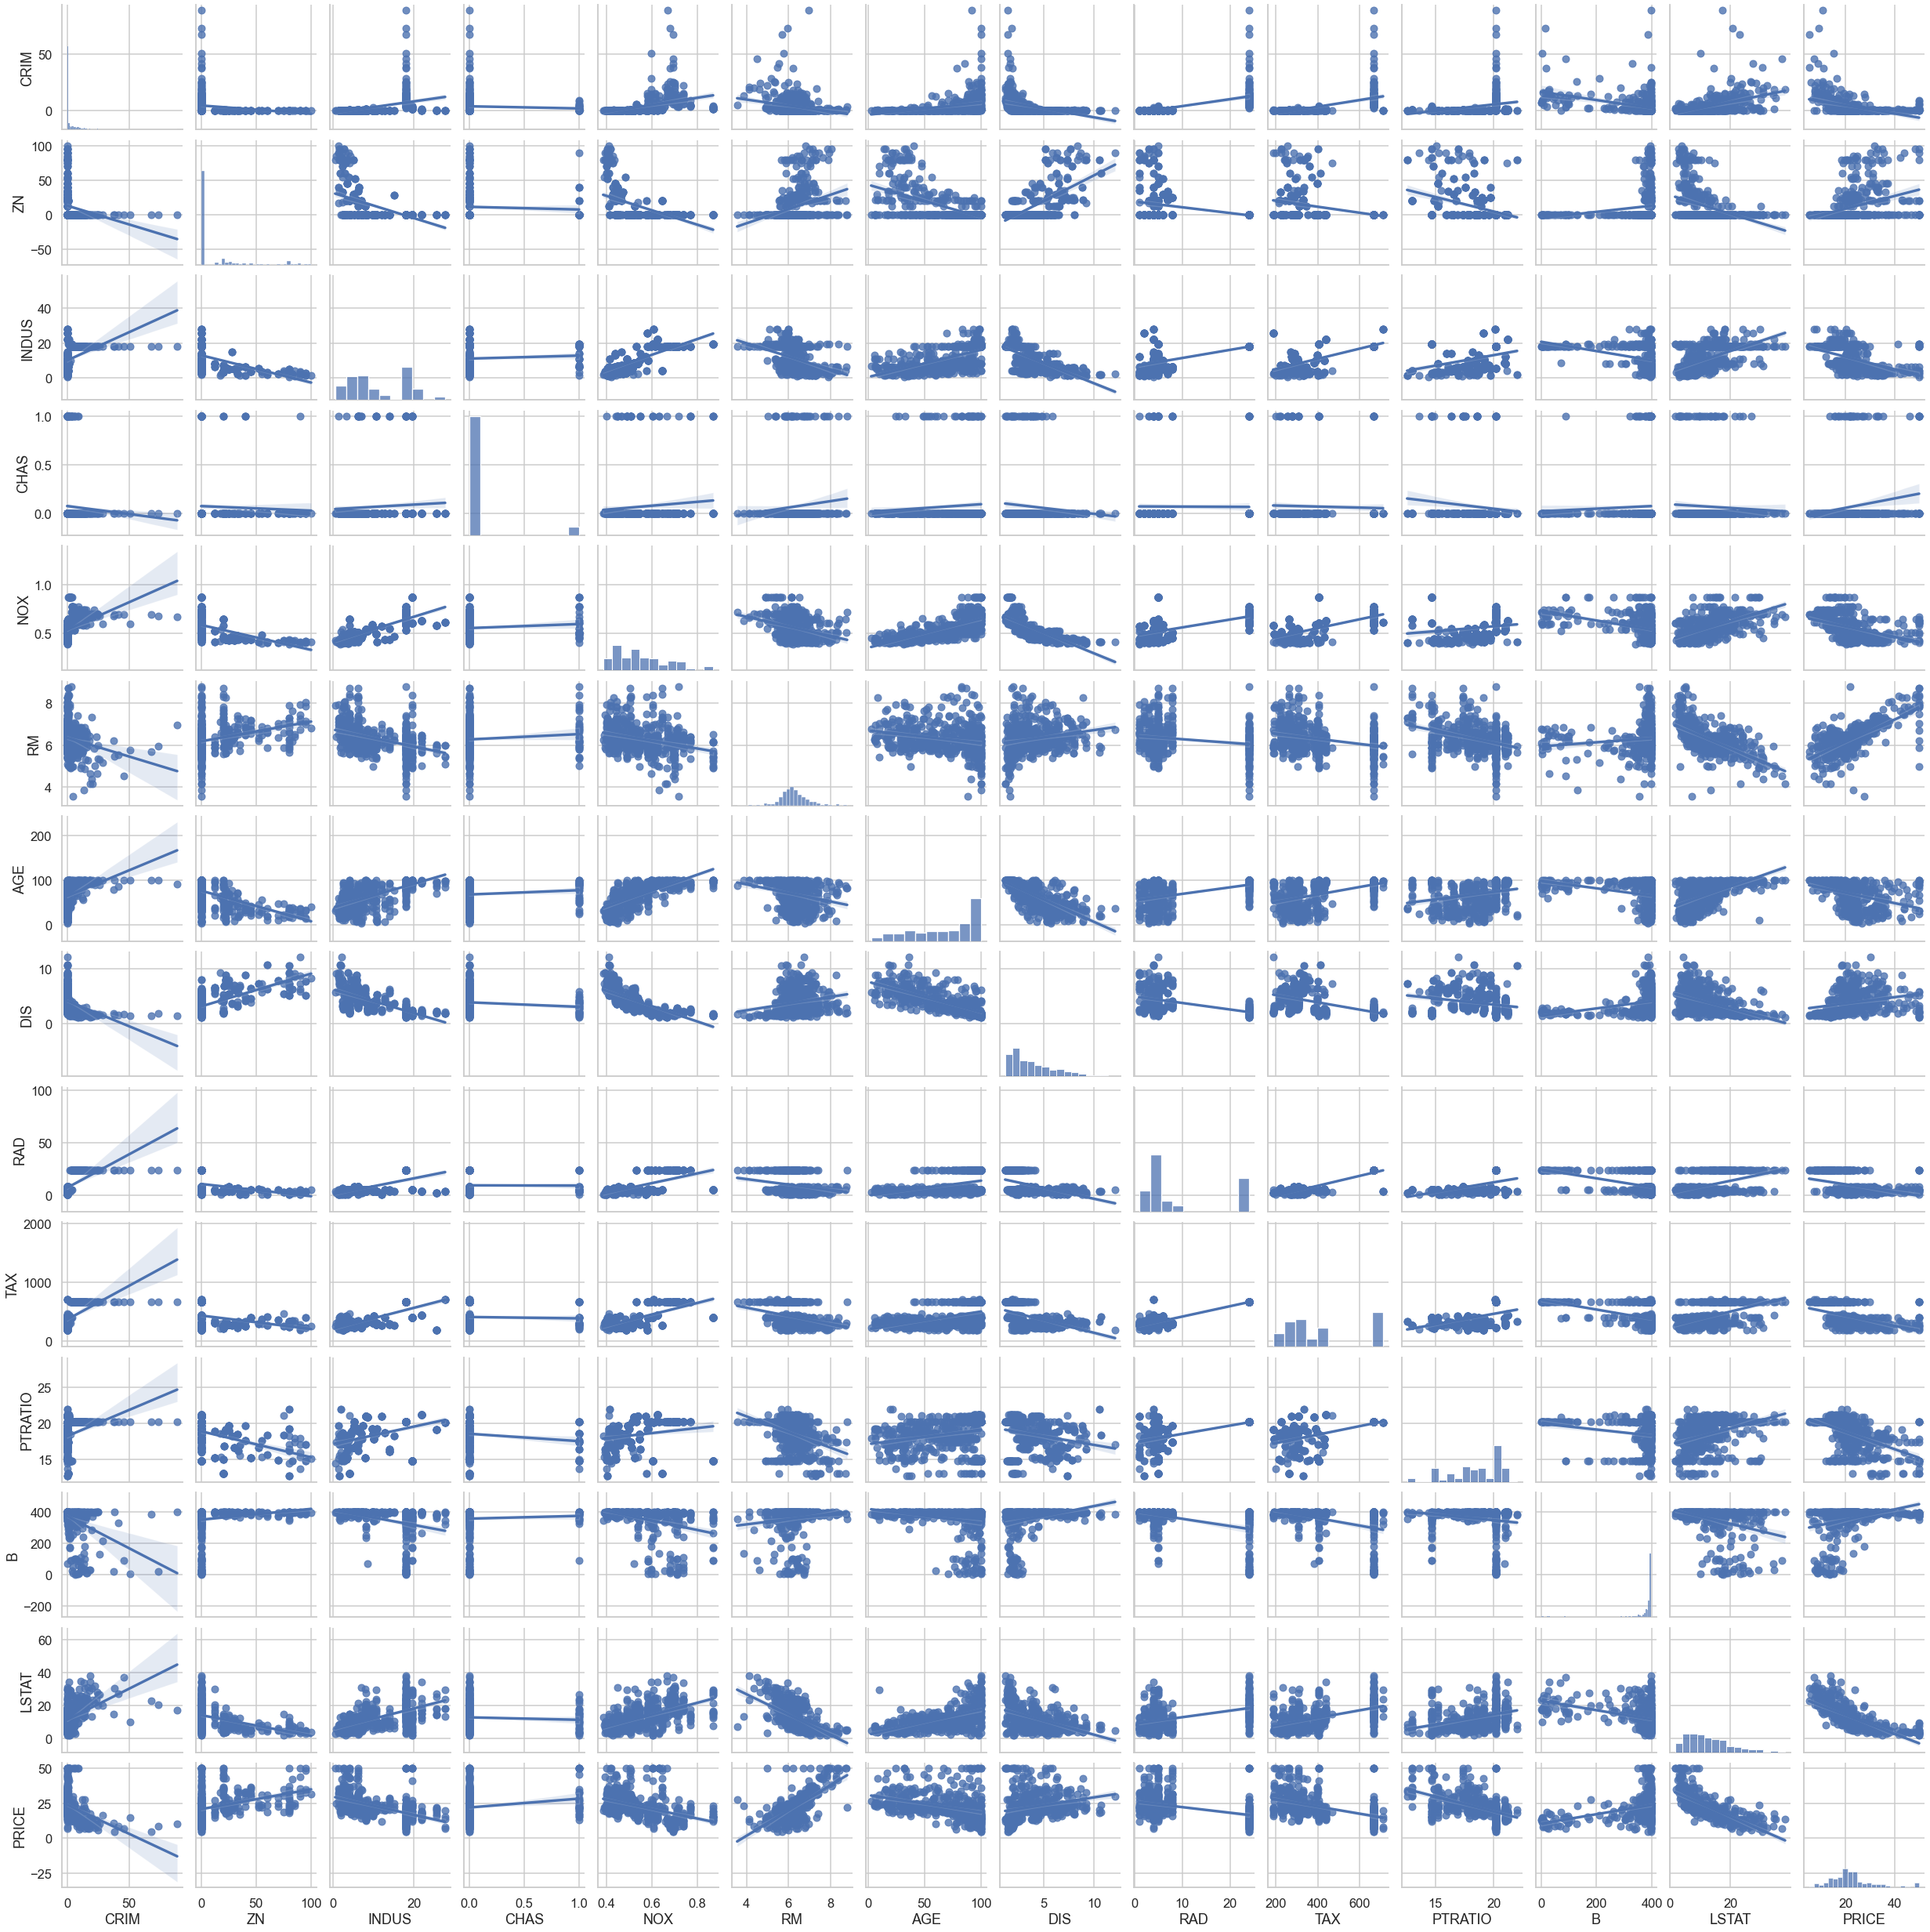

CPU times: user 44.1 s, sys: 813 ms, total: 45 s
Wall time: 44 s


In [115]:
%%time

sns.pairplot(data, kind="reg")
plt.show()

## Training & Test Dataset Split

In [116]:
prices = data["PRICE"]
features = data.drop("PRICE", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# % of training set - test
len(X_test)/len(features)

0.2015810276679842

## Multivariable Regression

In [117]:
regr = LinearRegression()

In [118]:
regr.fit(X_train, Y_train)
print("Intercept:", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])

Intercept: 36.533051382824894


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [119]:
# r-squared error
print("Training data r-squared:", regr.score(X_train, Y_train))
print("Test data r-squared:", regr.score(X_test, Y_test))

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115652


## Data Transformations

In [120]:
data["PRICE"].skew()

1.1080984082549072

In [121]:
y_log = np.log(data["PRICE"])

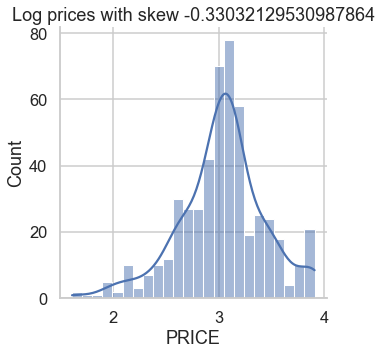

In [122]:
sns.displot(y_log, kde=True)
plt.title(f"Log prices with skew {y_log.skew()}")
plt.show()

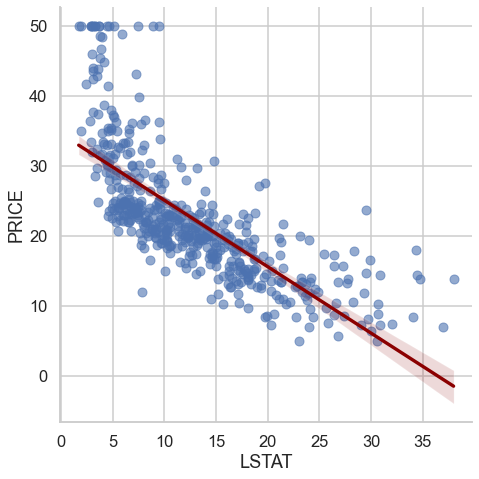

In [123]:
sns.lmplot(x="LSTAT", y="PRICE", data=data, height=7, scatter_kws={"alpha": 0.6}, line_kws={"color": "darkred"})
plt.show()

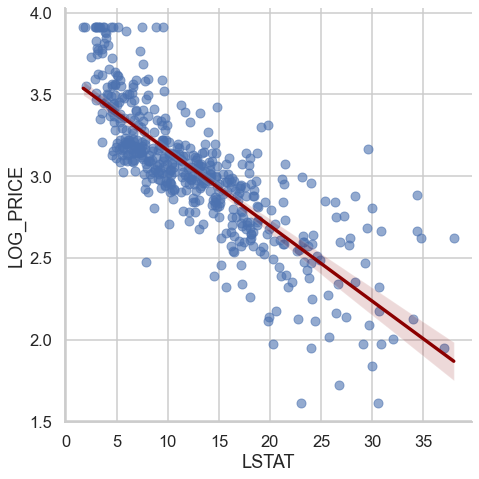

In [124]:
transformed_data = features
transformed_data["LOG_PRICE"] = y_log
sns.lmplot(x="LSTAT", y="LOG_PRICE", data=transformed_data, height=7, scatter_kws={"alpha": 0.6}, line_kws={"color": "darkred"})
plt.show()

In [125]:
prices = np.log(data["PRICE"])
features = data.drop("PRICE", axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

log_regr = LinearRegression()
log_regr.fit(X_train, Y_train)
print("Intercept:", log_regr.intercept_)

# r-squared error
print("Training data r-squared:", log_regr.score(X_train, Y_train))
print("Test data r-squared:", log_regr.score(X_test, Y_test))

pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=["coef"])

Intercept: 4.059943871775209
Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260741


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


## p values & Evaluating Coefficients

In [126]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _2 NOX + .. + \alpha _12 LSTAT $$

$$ VIF _{TAX} = \frac{1}{1 - R _{TAX} ^ 2} $$

In [127]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(len(X_incl_const.columns))]
pd.DataFrame({"coef_name": X_incl_const.columns, "vif": np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification

In [128]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

results.summary() # get all param values
print("r-squared:", results.rsquared)
print("BIC:",results.bic)

r-squared: 0.7930234826697584
BIC: -139.74997769478898


/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [129]:
# model with log prices and without INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS"], axis=1)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

results.summary() # get all param values
print("r-squared:", results.rsquared)
print("BIC:",results.bic)

r-squared: 0.7927126289415163
BIC: -145.14508855591163


/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [140]:
# model with log prices and without INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS", "AGE"], axis=1)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({"coef": results.params, "p-values": round(results.pvalues, 3)})

results.summary() # get all param values
print("r-squared:", results.rsquared)
print("BIC:",results.bic)

r-squared: 0.7493053373352907
BIC: 2414.269332783494


/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [131]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residual Plots

/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


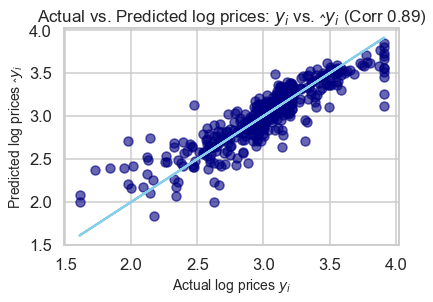

In [132]:
# Modified Model: transformed (using log prices) & simplified (dropping two features)
prices = np.log(data["PRICE"])
features = data.drop(["PRICE", "INDUS", "AGE"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_incl_const)
results = model.fit()

# Residuals
#residuals = Y_train - results.fittedvalues
#results.resid

# Graph of actual vs. predicted prices
corr = round(Y_train.corr(results.fittedvalues), 2)
plt.scatter(Y_train, results.fittedvalues, c="navy", alpha=0.6)
plt.plot(Y_train, Y_train, c="skyblue")

plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Predicted log prices $\hat y _i$", fontsize=14)
plt.title(f"Actual vs. Predicted log prices: $y _i$ vs. $\hat y_i$ (Corr {corr})", fontsize=17)

plt.show()

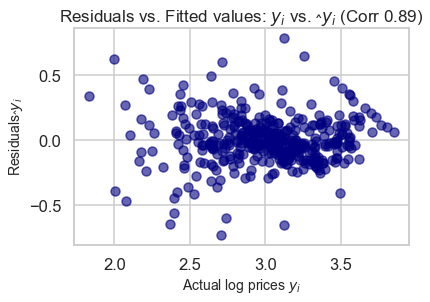

In [134]:
# Residuals vs. predicted values
plt.scatter(results.fittedvalues, results.resid, c="navy", alpha=0.6)

plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Residuals$\hat y _i$", fontsize=14)
plt.title(f"Residuals vs. Fitted values: $y _i$ vs. $\hat y_i$ (Corr {corr})", fontsize=17)

plt.show()

/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


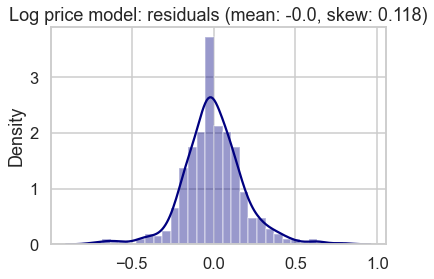

In [135]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color="navy")
plt.title(f"Log price model: residuals (mean: {resid_mean}, skew: {resid_skew})")
plt.show()

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(["PRICE"], axis=1), data["PRICE"], test_size=0.2, random_state=10)

# Using Statsmodel
X_og_incl_const = sm.add_constant(X_train)

og_model = sm.OLS(Y_train, X_og_incl_const)
og_results = og_model.fit()


/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


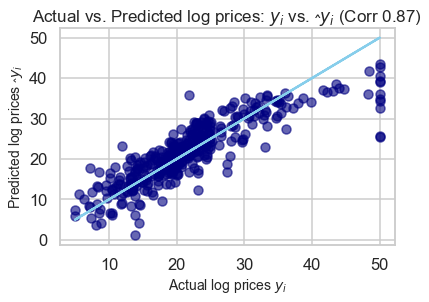

In [137]:
plt.scatter(Y_train, og_results.fittedvalues, c="navy", alpha=0.6)
plt.plot(Y_train, Y_train, c="skyblue")
corr = round(Y_train.corr(og_results.fittedvalues), 2)

plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Predicted log prices $\hat y _i$", fontsize=14)
plt.title(f"Actual vs. Predicted log prices: $y _i$ vs. $\hat y_i$ (Corr {corr})", fontsize=17)

plt.show()

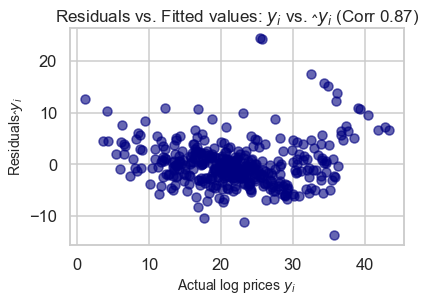

In [138]:
# Residuals vs. predicted values
plt.scatter(og_results.fittedvalues, og_results.resid, c="navy", alpha=0.6)

plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Residuals$\hat y _i$", fontsize=14)
plt.title(f"Residuals vs. Fitted values: $y _i$ vs. $\hat y_i$ (Corr {corr})", fontsize=17)

plt.show()

/Users/floriandreyer/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


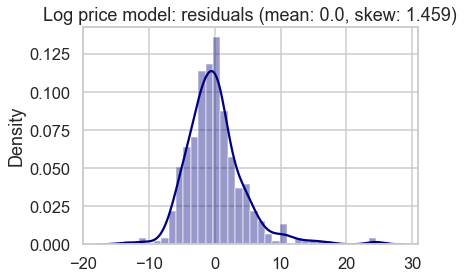

In [139]:
# Distribution of Residuals (log prices) - checking for normality
og_resid_mean = round(og_results.resid.mean(), 3)
og_resid_skew = round(og_results.resid.skew(), 3)

sns.distplot(og_results.resid, color="navy")
plt.title(f"Log price model: residuals (mean: {og_resid_mean}, skew: {og_resid_skew})")
plt.show()